<a href="https://colab.research.google.com/github/ZishanSayyed/Gender-Detection-Using-CNN/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gender Detection Model By CNN

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [7]:
import os
os.environ["KAGGLE_USERNAME"]="zishansayyed"
os.environ["KAGGLE_KEY"]="9fe5d1f8d4a59417713436d574b6242b"

In [ ]:
! kaggle datasets download -d cashutosh/gender-classification-dataset

 98% 264M/269M [00:02<00:00, 111MB/s]
100% 269M/269M [00:02<00:00, 114MB/s]


In [ ]:
! unzip gender-classification-dataset

In [ ]:
train_dir="/content/Training"
valid_dir="/content/Validation"

tain_dir_m=os.path.join(train_dir,"male")
tain_dir_f=os.path.join(train_dir,"female")


In [8]:
train_male_names=os.listdir(tain_dir_m)
print(train_male_names[:10])

train_fmale_names=os.listdir(tain_dir_f)
print(train_fmale_names[:10])

['120596.jpg.jpg', '183779.jpg.jpg', '196693.jpg.jpg', '172456.jpg.jpg', '113272.jpg.jpg', '106416.jpg.jpg', '093166.jpg.jpg', '135063.jpg.jpg', '098653.jpg.jpg', '189321.jpg.jpg']
['159178.jpg.jpg', '170434.jpg.jpg', '156709.jpg.jpg', '165287.jpg.jpg', '170494.jpg.jpg', '138652.jpg.jpg', '151128.jpg.jpg', '182427.jpg.jpg', '153357.jpg.jpg', '142564.jpg.jpg']


In [9]:
import matplotlib.image as mimg
nrows=4
ncols=4
plt.figure(figsize=(20,20))

male_pic=[]
for i in train_male_names[0:8]:
  male_pic.append(os.path.join(tain_dir_m,i))


fmale_pic=[]
for i in train_fmale_names[0:8]:
  fmale_pic.append(os.path.join(tain_dir_f,i))

<Figure size 1440x1440 with 0 Axes>

In [10]:
print(male_pic)
print(fmale_pic)

['/content/Training/male/120596.jpg.jpg', '/content/Training/male/183779.jpg.jpg', '/content/Training/male/196693.jpg.jpg', '/content/Training/male/172456.jpg.jpg', '/content/Training/male/113272.jpg.jpg', '/content/Training/male/106416.jpg.jpg', '/content/Training/male/093166.jpg.jpg', '/content/Training/male/135063.jpg.jpg']
['/content/Training/female/159178.jpg.jpg', '/content/Training/female/170434.jpg.jpg', '/content/Training/female/156709.jpg.jpg', '/content/Training/female/165287.jpg.jpg', '/content/Training/female/170494.jpg.jpg', '/content/Training/female/138652.jpg.jpg', '/content/Training/female/151128.jpg.jpg', '/content/Training/female/182427.jpg.jpg']


In [11]:
pics=male_pic+fmale_pic
len(pics)

16

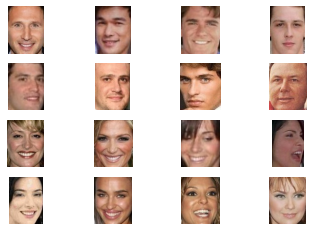

In [13]:
for i in range(0,len(pics)):
  data=pics[i].split("/",2)[2]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis("off")
  image=mimg.imread(pics[i])
  plt.imshow(image,cmap="gray")

plt.show()

In [14]:
train_dgen=ImageDataGenerator(rescale=1/255,
                              zoom_range=0.3,
                              rotation_range=50,
                              width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True
                              )
valid_dgen=ImageDataGenerator(rescale=1/255)

In [15]:
train_gen=train_dgen.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")



Found 47009 images belonging to 2 classes.


In [16]:
valid_gen=valid_dgen.flow_from_directory(valid_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                        class_mode="binary")

Found 11649 images belonging to 2 classes.


In [17]:
print(train_gen.class_indices)
print(train_gen.image_shape)

{'female': 0, 'male': 1}
(150, 150, 3)


In [ ]:
#performing CNN and Building modle

model=Sequential()
#adding 1st layer
model.add(Conv2D(32,(3,3),padding="SAME",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


#adding 2nd layer
model.add(Conv2D(64,(3,3),padding="SAME",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#falttening the layer
model.add(Flatten())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
trainning=model.fit(train_gen,
                    steps_per_epoch=70,
                    epochs=30,
                    validation_data=valid_gen,
                    validation_steps=50)


In [ ]:
pd.DataFrame(trainning.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [ ]:
#running model on test data

test_loss ,test_acc=model.evaluate(valid_gen)

In [ ]:
model.save("gen_detection_model.h5")

In [18]:
##to increse model performacne more we use VGG16

In [19]:
from tensorflow.keras.applications import VGG16
con_base=VGG16(weights="imagenet",
              include_top=False,
              input_shape=(150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


In [20]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
model2=Sequential()
model2.add(con_base)
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 18,910,017
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers
model2.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(0.0001),
              metrics =['accuracy'])

In [23]:
from tensorflow import keras
checkpoint_cp=keras.callbacks.ModelCheckpoint("GD_model-(epoch:02d).h5")

In [24]:
model_FIT2= model2.fit_generator(
          train_gen,
          steps_per_epoch=100,
          epochs=20,
          validation_data=valid_gen,
          validation_steps=50,
          callbacks=[checkpoint_cp])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 28s 282ms/step - loss: 0.7103 - accuracy: 0.5094 - val_loss: 0.6208 - val_accuracy: 0.6325
Epoch 2/20
100/100 [==============================] - 28s 285ms/step - loss: 0.5404 - accuracy: 0.7294 - val_loss: 0.6246 - val_accuracy: 0.6419
Epoch 3/20
100/100 [==============================] - 29s 286ms/step - loss: 0.3666 - accuracy: 0.8484 - val_loss: 0.3140 - val_accuracy: 0.9019
Epoch 4/20
100/100 [==============================] - 28s 285ms/step - loss: 0.3050 - accuracy: 0.8759 - val_loss: 0.3269 - val_accuracy: 0.8706
Epoch 5/20
100/100 [==============================] - 29s 286ms/step - loss: 0.2859 - accuracy: 0.8991 - val_loss: 0.1919 - val_accuracy: 0.9319
Epoch 6/20
100/100 [==============================] - 29s 288ms/step - loss: 0.2534 - accuracy: 0.9000 - val_loss: 0.1208 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================] - 

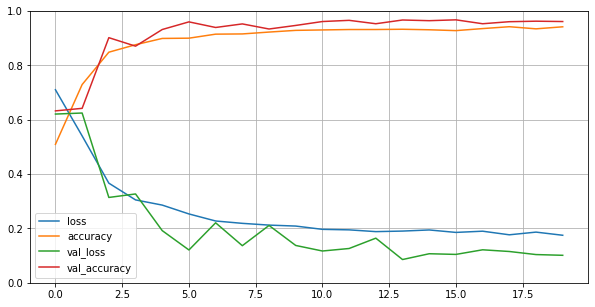

In [25]:
pd.DataFrame(model_FIT2.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
#now seeing how model works by providing data which was not present prviously
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fname in uploaded.keys():
  img_path="/content/"+fname
  img= image.load_img(img_path , target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model2.predict(images)
  print(fname)
  if prediction==0:
    print("Fmale")

  else:
    print("Male")

Saving 063478.jpg.jpg to 063478.jpg.jpg
Saving 063479.jpg.jpg to 063479.jpg.jpg
Saving 063489.jpg.jpg to 063489.jpg.jpg
Saving 063491.jpg.jpg to 063491.jpg.jpg
Saving 063495.jpg.jpg to 063495.jpg.jpg
Saving 063496.jpg.jpg to 063496.jpg.jpg
Saving 063500.jpg.jpg to 063500.jpg.jpg
Saving 112944.jpg.jpg to 112944.jpg.jpg
Saving 112950.jpg.jpg to 112950.jpg.jpg
Saving 112953.jpg.jpg to 112953.jpg.jpg
Saving 112956.jpg.jpg to 112956.jpg.jpg
Saving 112959.jpg.jpg to 112959.jpg.jpg
Saving 112961.jpg.jpg to 112961.jpg.jpg
Saving 112967.jpg.jpg to 112967.jpg.jpg
063478.jpg.jpg
Male
063479.jpg.jpg
Male
063489.jpg.jpg
Male
063491.jpg.jpg
Male
063495.jpg.jpg
Male
063496.jpg.jpg
Male
063500.jpg.jpg
Male
112944.jpg.jpg
Fmale
112950.jpg.jpg
Fmale
112953.jpg.jpg
Fmale
112956.jpg.jpg
Fmale
112959.jpg.jpg
Fmale
112961.jpg.jpg
Fmale
112967.jpg.jpg
Fmale


In [ ]:
#END